# Poisson modeling using ARIMA models

In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.arima import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Example of our Poisson process

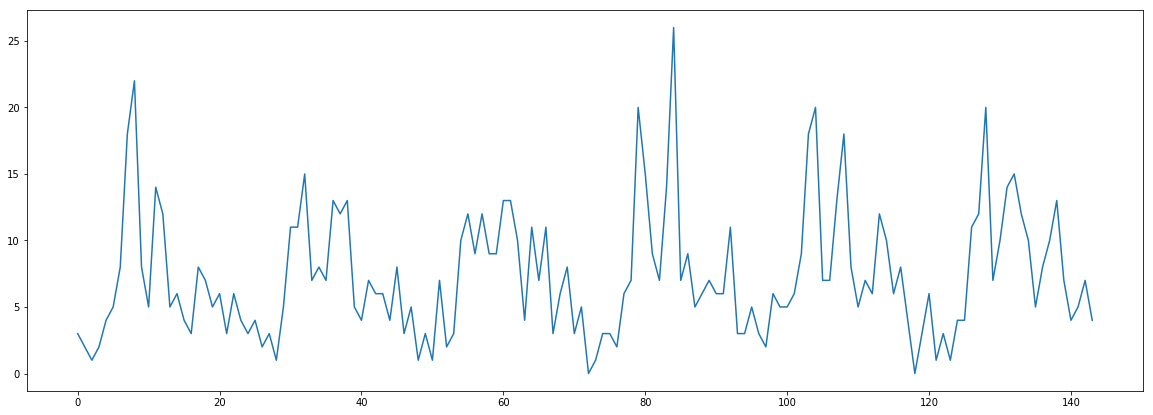

In [3]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Apply the ARIMA model to a new data set that is more varied

In [39]:
a1 = p.generate(14)
a2 = p.generate(3,2)
a3 = p.generate(8)
a4 = p.generate(2,2)
actual = numpy.concatenate((a1,a2,a3,a4))

arima = ARIMA((2,1,0),96)
pred = arima.predict(actual)

### Plot the prediction

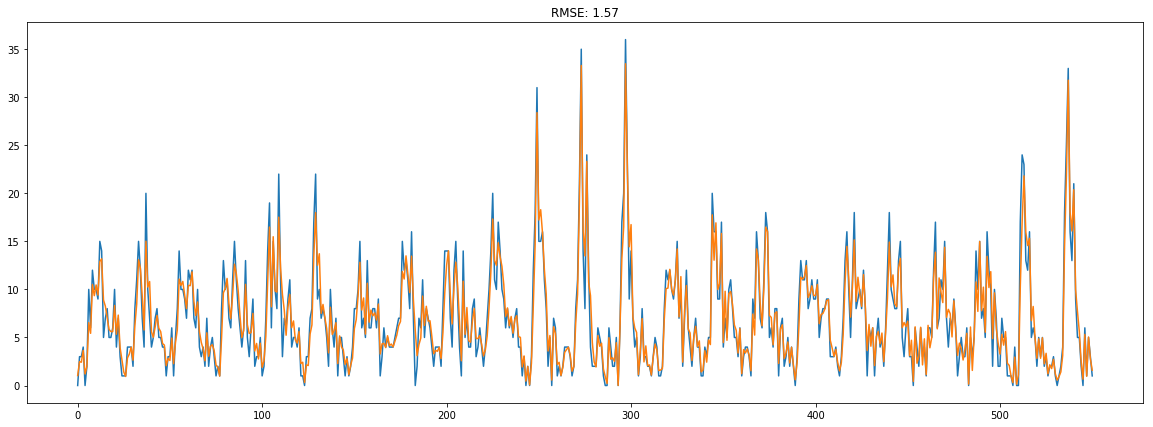

In [40]:
actual = actual[95:-2]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

### Evaluate the residual

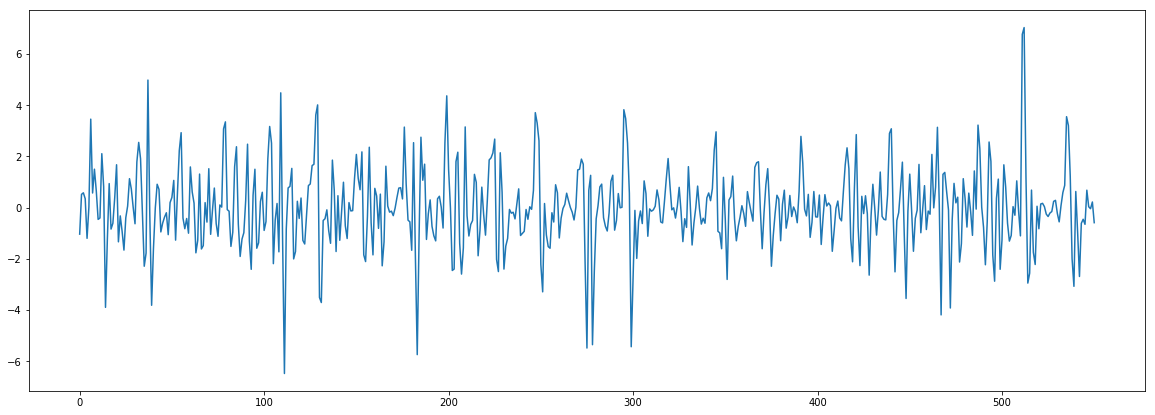

In [41]:
residual = []
for i in range(len(actual)):
    val = actual[i] - pred[i][0]
    residual.append(val)

plt.figure(figsize=(20,7))
plt.plot(residual)

### General results

The data we have here does not admit a particularly good solution with ARIMA methods.  Assuming the integral term as a means of addressing seasonality makes a big impact.  However, there are no choices of coefficient that result in a residual that is normal.  The ARIMA model does have a fairly faithful tracking of the fluctuating data because it is coupled to the data.  It tends to be better the more of the history of the function the coefficients are computed from.  For some problems this may be an adequate solution, but it should be well known that the approach leaves a lot to be desired.